In [1]:
# run this cell before all the others
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


**1) Data Description**

In the players.csv data set, there are:
- 196 rows (observations)
- 7 columns (variables)
    - <u>experience</u>
    - this represents the level of MineCraft experience that a player has
    - a character variable with 5 categories: Veteran, Pro, Amateur, Regular and Beginner
    - <u>subscribe</u>
    - this indicates whether a player has subscribed to the game-related newsletter or not
    - a logical variable with two categories: TRUE and FALSE (later renamed in data set to Yes and No)
    - <u>hashedEmail</u>
    - this represents a player's hashed email address
    - a character variable
    -  <u>played_hours</u>
    - this represents the number of hours played by each individual
    - a double variable (for continuous numerical values) 
    - <u>name</u>
    - this reports the player's first name
    - a character variable
    - <u>gender</u>
    - this reports a player's gender
    - a character variable
    - <u>Age</u>
    - this reports a player's age
    - an integer variable (for discrete numerical values)

Within this dataset, the summary statistics for means of each quantitative variable were collected.
- the mean of player's age was ~21.14 years old
- the mean for hours played was ~5.85 hours

**2) Question**

My broad question of interest is "What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?"

My specific question is "can age predict whether a player subscribes to the newsletter in the players.csv data set?"

The data will help me address my question because it includes information on the players who have subscribed and how old they are.

**3) Exploratory Data Analysis and Visualization**

In [2]:
players<-read.csv("https://raw.githubusercontent.com/laurentang3/dsci-100-project-009-45/refs/heads/main/players.csv")
# players
colnames(players)

[1] "experience"   "subscribe"    "hashedEmail"  "played_hours" "name"        
[6] "gender"       "Age"

a) compute the mean value for each quantitative variable in the players data set

In [3]:
player_means <- players |>
    summarize(played_hours = mean(played_hours, na.rm=TRUE),
             Age = mean(Age, na.rm=TRUE))
player_means

played_hours,Age
<dbl>,<dbl>
5.845918,21.13918


b) total number of players for experience level, subscription status and gender (OR NOT GENDER)

In [10]:
# Experience level
experience_counts <- players |>
    group_by(experience) |>
    summarize(count=n())
experience_counts

# Subscription Status
# renaming the variables within the subscribe column
subscribe_mutated <- mutate(players, subscribe = as_factor(subscribe)) |>
    mutate(subscribe = fct_recode(subscribe, "Yes" = "TRUE", "No" = "FALSE"))

# Totalling the number of players based on subscription
subscriber_counts <- subscribe_mutated |>
    group_by(subscribe) |>
    summarize(count=n())
subscriber_counts

# # Gender
# gender_counts <- players |>
#     group_by(gender) |>
#     summarize(count=n())
# gender_counts

experience,count
<chr>,<int>
Amateur,63
Beginner,35
Pro,14
Regular,36
Veteran,48


subscribe,count
<fct>,<int>
No,52
Yes,144


c) getting the breakdown of the ages that individuals are subscribed

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


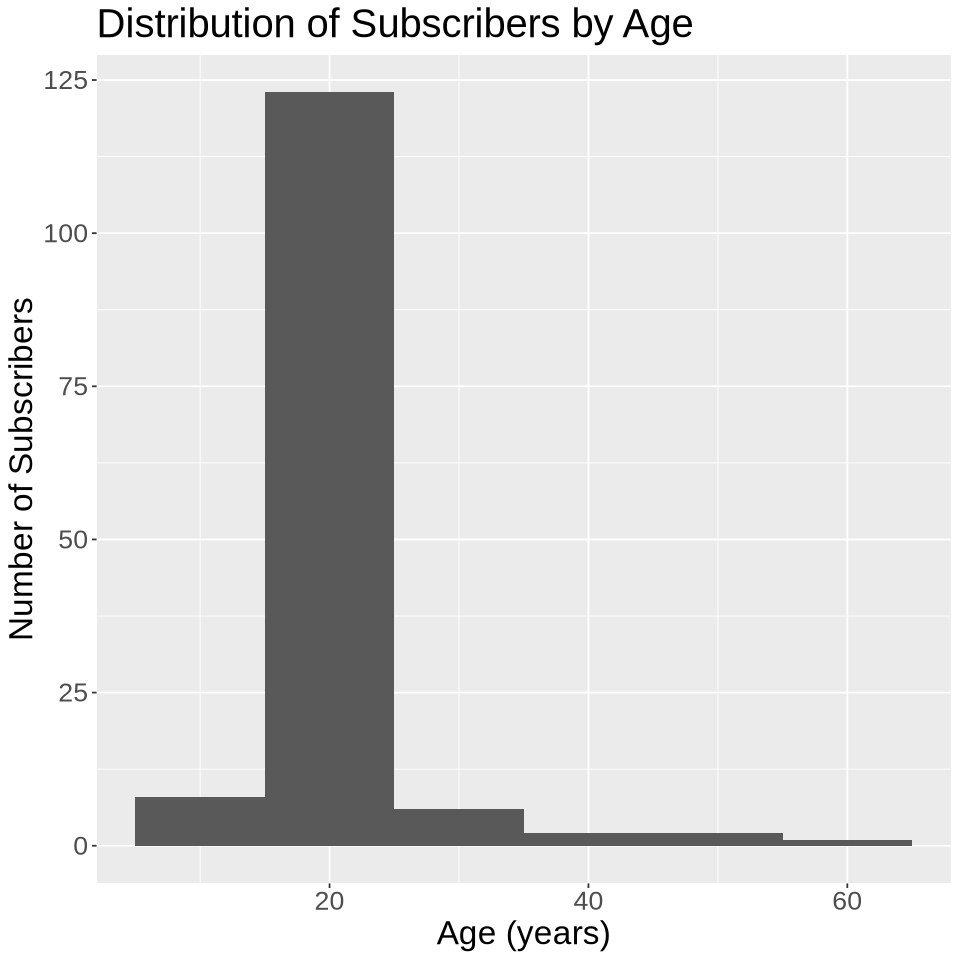

In [28]:
options(repr.plot.width=8, repr.plot.height=8)
age_subscribers <- subscribe_mutated |>
    filter(subscribe == "Yes") |>
    ggplot(aes(x=Age)) +
    geom_histogram(binwidth = 10) +
    labs(x="Age (years)", y="Number of Subscribers", title="Distribution of Subscribers by Age") +
    theme(text=element_text(size=20))
age_subscribers

c) minimum, maximum and mean number of players' age and number of hours played

In [5]:
# Age
age_summary <- players |>
    summarize(age_min = min(Age, na.rm=TRUE),
             age_max = max(Age, na.rm=TRUE),
             age_mean = mean(Age, na.rm=TRUE))
age_summary

# # Hours played
# played_hours_summary <- players |>
#     summarize(played_hours_min = min(played_hours, na.rm=TRUE),
#              played_hours_max = max(played_hours, na.rm=TRUE),
#              played_hours_mean = mean(played_hours, na.rm=TRUE))
# played_hours_summary

age_min,age_max,age_mean
<int>,<int>,<dbl>
9,58,21.13918


played_hours_min,played_hours_max,played_hours_mean
<dbl>,<dbl>,<dbl>
0,223.1,5.845918


d) histogram for distributions of ages and hours played among players

In [6]:
options(repr.plot.width = 8, repr.plot.height = 8)
# Age
age_counts <- ggplot(players, aes(x=Age)) +
    geom_histogram(binwidth=10) +
    labs(x="Age", y="Count", title="Ages among Players") +
    theme(text=element_text(size=20))
# age_counts

# Hours played
played_hours_counts <- ggplot(players, aes(x=played_hours)) +
    geom_histogram(boundary = 0, binwidth=25) +
    labs(x="Hours", y="Count", title="Number of Hours Played Among Players") +
    theme(text=element_text(size=20))
# played_hours_counts

In [7]:
# sessions<-read.csv("https://raw.githubusercontent.com/laurentang3/dsci-100-project-009-45/refs/heads/main/sessions.csv")
# # sessions
# colnames(sessions)

a) computing the duration of play for each session

In [8]:
# sessions_mutated <- sessions |>
#   mutate(start_time = ymd_hms(start_time),
#     end_time = ymd_hms(end_time)) |>
#     mutate(playing_duration = as.numeric(difftime(end_time, start_time, units = "secs")))
# # sessions_mutated

b) finding the minimum, maximum and mean playing duration

In [9]:
# # filter out invalid sessions (mistake in years)
# sessions_corrected <- sessions_mutated |>
#     filter(end_time >= start_time)

# playing_duration_summary <- sessions_corrected |>
#   summarise(playing_duration_min  = min(playing_duration, na.rm = TRUE), # represented in seconds,
#     playing_duration_max  = max(playing_duration, na.rm = TRUE),
#     playing_duration_mean = mean(playing_duration, na.rm = TRUE)) |>
#     mutate(playing_duration_max = playing_duration_max / 86400, # represented in days
#           playing_duration_mean = playing_duration_mean / 86400) # represented in days
# playing_duration_summary

The minimum playing duration is 3 seconds.
The maximum playing duration is ~366 days.
The average playing duration is ~21 days.

**4) Methods and Plan**

TEXT HERE

**5) GitHub Repository**

https://github.com/laurentang3/dsci-100-project-009-45.git